[0. 0. 0. ... 0. 0. 0.]


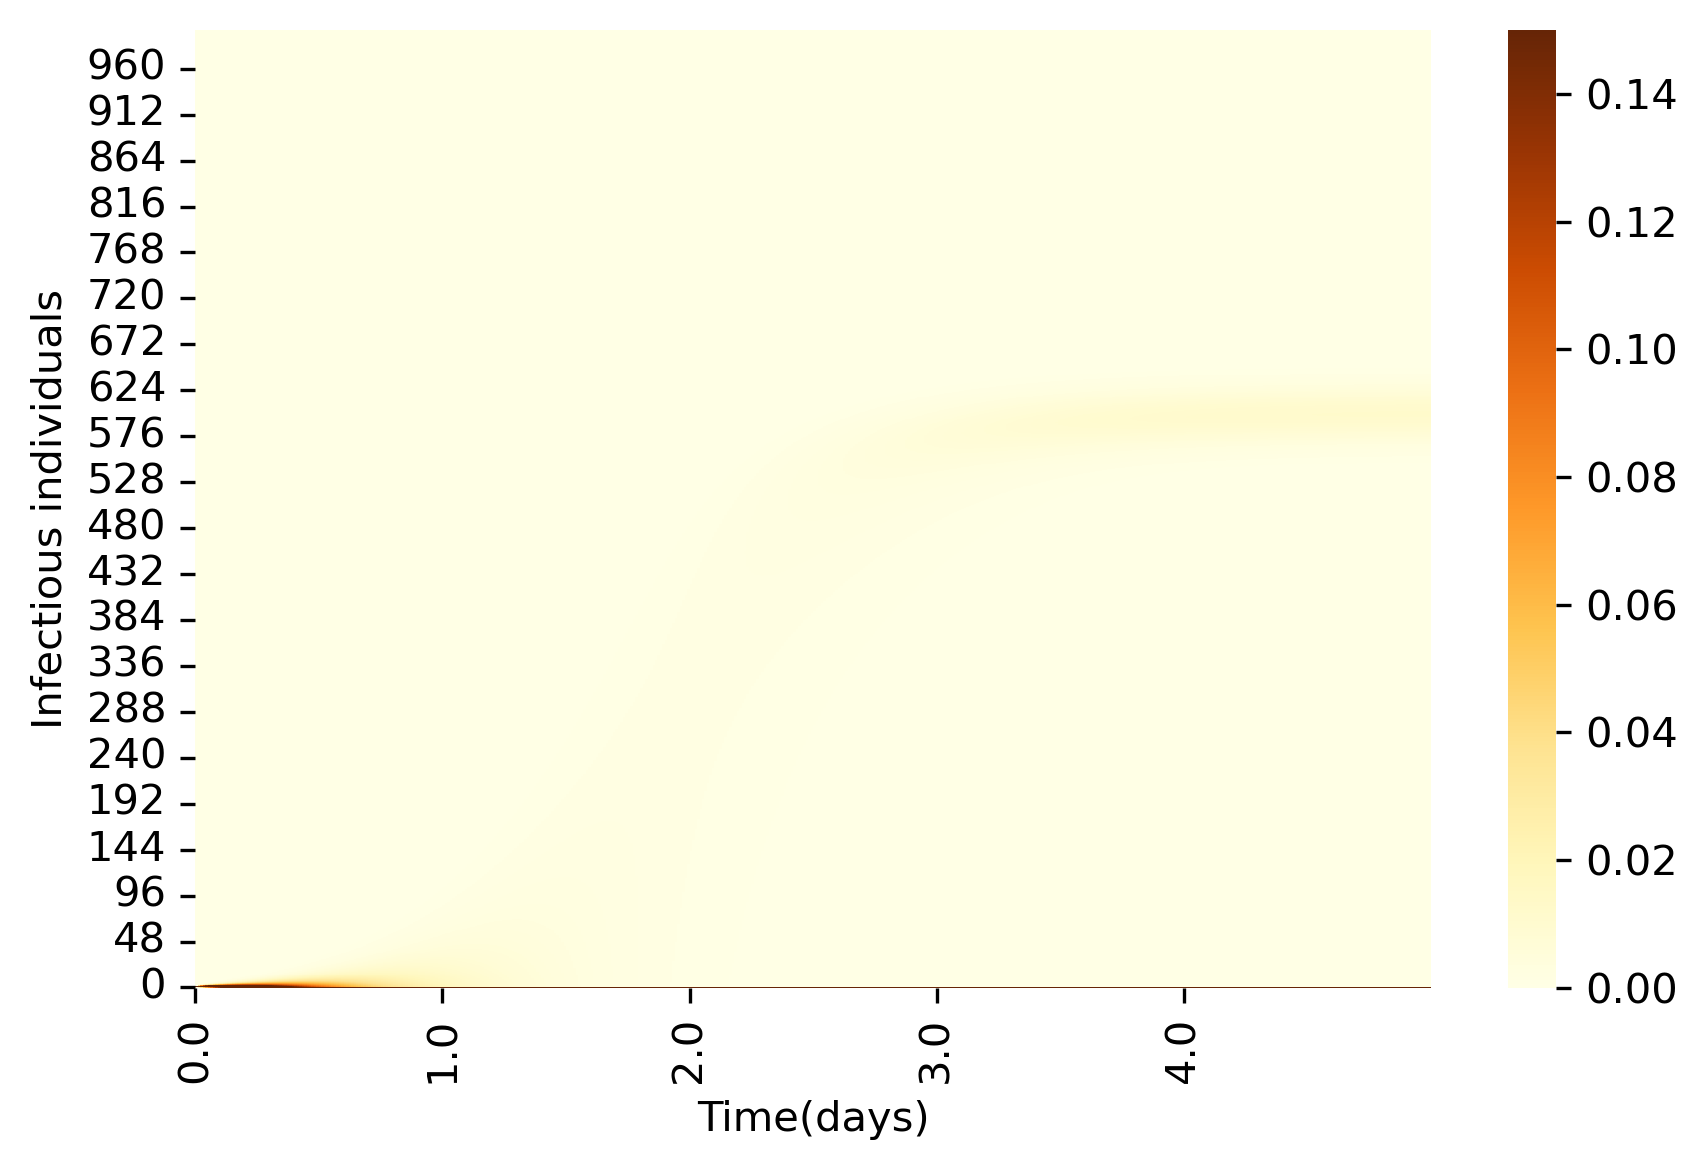

In [30]:
import math as ma
import random
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time as ti
import scipy.linalg as la
import scipy
from scipy.integrate import odeint
def Matrix_form_generator(popsize,beta,gamma):
    size=popsize+1
    u=[[0.0 for i in range(size)] for j in range(size)]
    for i in range(1,size-1):
        u[i][i]= -i*(beta*(popsize-i)/popsize+gamma)
        u[i][i+1]=beta*i*(popsize-i)/popsize
        u[i][i-1]=gamma*i
    u[1][0]=gamma
    u[popsize-1][popsize]=beta
    u[popsize][popsize-1]=gamma*popsize
    u[popsize][popsize]=-gamma*popsize
    return np.array(u)
def prom(yvec):
    prom=0
    for i in range(len(yvec)): 
        prom+=i*yvec[i]
    return prom
popsize=1000
y0=[0.0 for i in range(popsize+1)]
y0[1]=1.0
y0=np.array(y0)
dt=0.1
beta=0.5
gamma=0.2
npuntos=500
times=[0.0+i*dt for i in range(npuntos)]
times=np.array(times)
A=Matrix_form_generator(popsize,beta,gamma)
print(A[0])
yprom=[]
ymax=[]
yvalp=y0
prob0=[]
prob1=[]
prob2=[]
tmat=[]
for tval in times:
    Liu=la.expm(tval*A)
    yval = np.dot(y0,Liu)
    #yvalp=yval
    #print(yval)
    yprom.append(prom(yval))
    ymax.append(np.argmax(yval[2:]))
    tmat.append(yval)
    print(tval,end="\r")
    #print(np.sum(yval))


tmat=np.array(tmat)
#sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(tmat.T,vmax=0.15,cmap="YlOrBr")
plt.ylim(0,popsize+1)
plt.xticks(range(0,npuntos,100),np.array(range(0,npuntos,100))/100)
plt.xlabel("Time(days)")
plt.ylabel("Infectious individuals")
plt.tight_layout()
##---------------------- Mean FIELD MODEL --------------------##
def deriv(y, t, N, beta, gamma):
    I = y
    S=N-y
    dIdt = beta * S * I / N - gamma * I
    return dIdt

# initial condition
y0ode = 1.0

# time points

# solve ODE
#y = odeint(deriv,y0ode,times,args=(popsize,beta,gamma))
#times=times*10
# plot results
#plt.plot(times,y,label="Mean field")
#plt.legend()
plt.show()

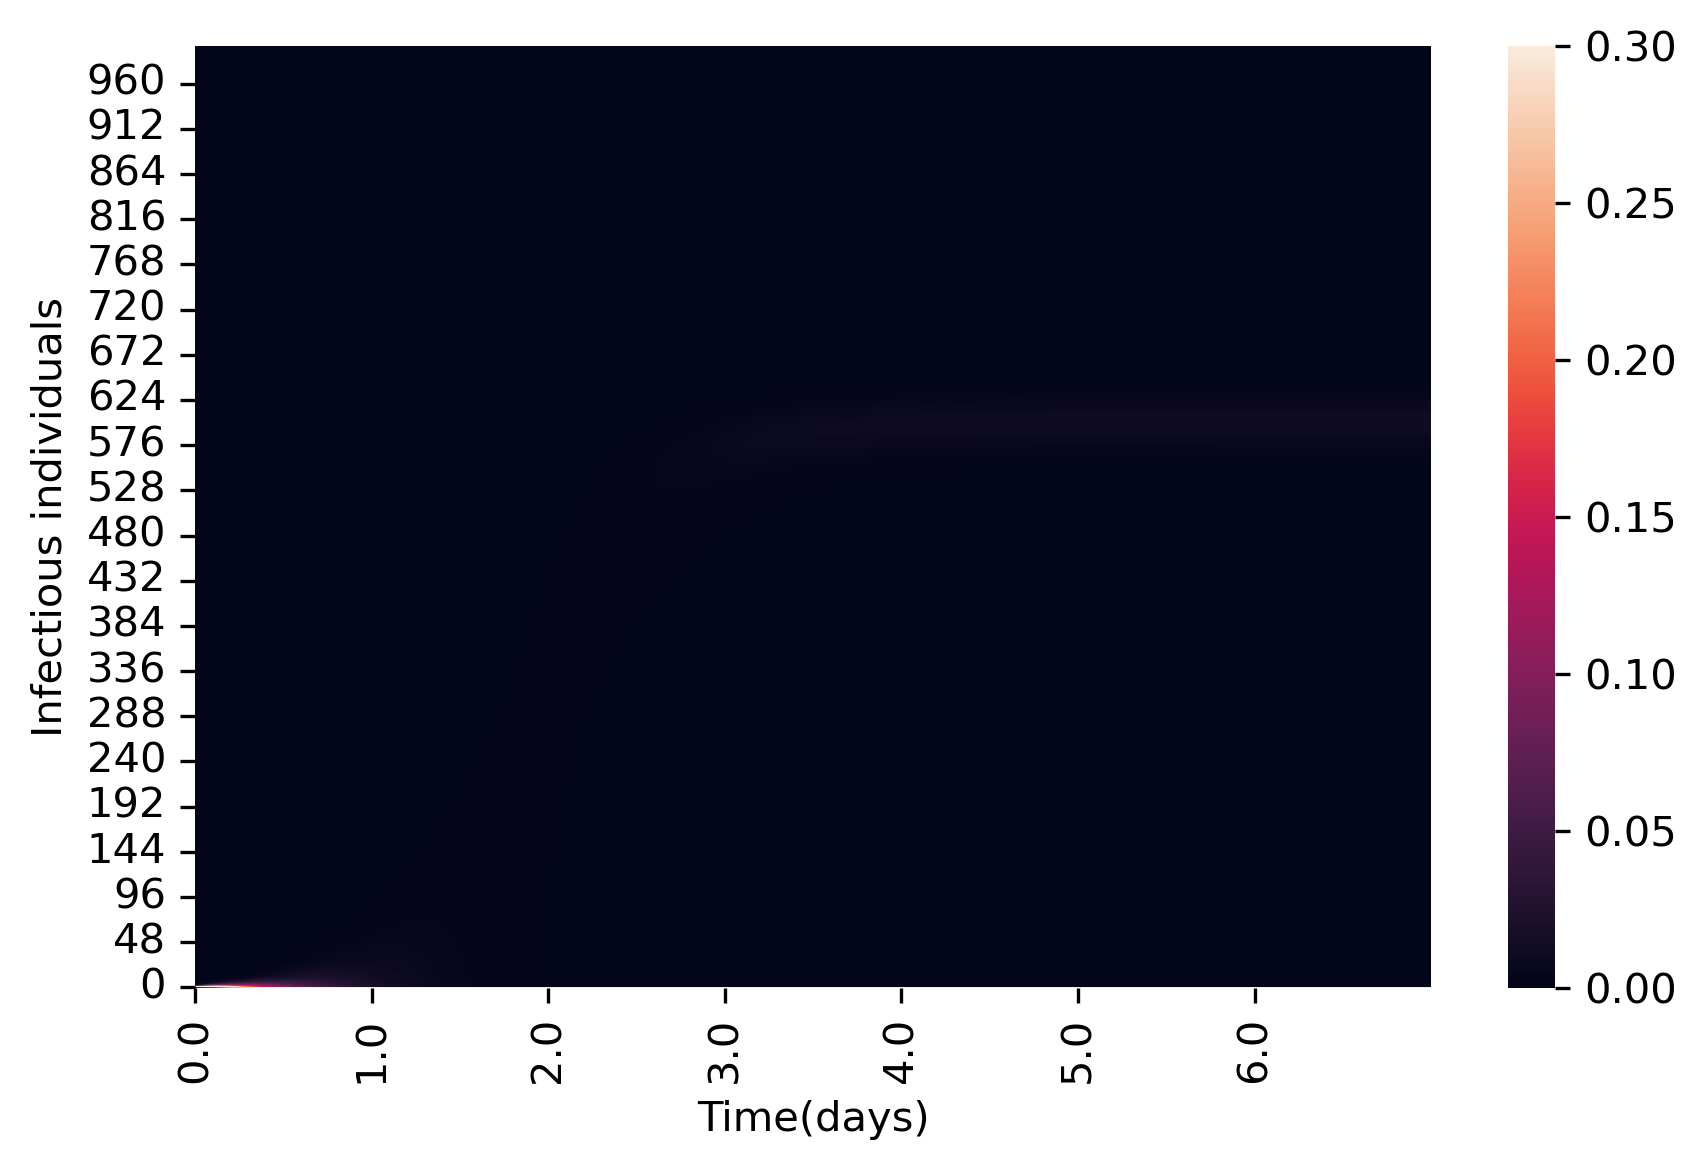

In [26]:
import math as ma
import random
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time as ti
import scipy.linalg as la
import scipy
from scipy.integrate import odeint
def Matrix_form_generator(popsize,beta,gamma):
    size=popsize+1
    u=[[0.0 for i in range(size)] for j in range(size)]
    for i in range(1,popsize):
        u[i][i]= -i*(beta*(popsize-i)/popsize+gamma)
        u[i][i+1]=beta*i*(popsize-i)/popsize
        u[i][i-1]=gamma*i
    u[1][0]=gamma
    u[popsize-1][popsize]=beta
    u[popsize][popsize-1]=gamma*popsize
    u[popsize][popsize]=-gamma*popsize
    return np.array(u)


popsize=1000
y0=[0.0 for i in range(popsize+1)]
y0[1]=1.0
y0t=np.array(y0).T
dt=0.1
beta=0.5
gamma=0.2
npuntos=500
times=[0.0+i*dt for i in range(npuntos)]
times=np.array(times)
A=Matrix_form_generator(popsize,beta,gamma)
#print(A[1])
yprom=[]
ymax=[]
yvalp=y0t
Liu=la.expm(dt*A).T
prob0=[]
prob1=[]
prob2=[]
tmat2=[]
for tval in times:
    yval = np.dot(Liu,yvalp)
    yvalp=yval
    #print(yval)
    #yprom.append(prom(yval))
    #ymax.append(np.argmax(yval[2:]))
    tmat2.append(yval.T)
    #print(np.sum(yval.T))


tmat2=np.array(tmat2)
sns.heatmap(tmat2.T,vmax=0.3)
plt.ylim(0,popsize+1)
plt.xticks(range(0,npuntos,100),np.array(range(0,npuntos,100))/100)
plt.xlabel("Time(days)")
plt.ylabel("Infectious individuals")
plt.tight_layout()

In [29]:
np.sum(abs(tmat+tmat2))

1399.9999999997067

(0.0, 501.0)

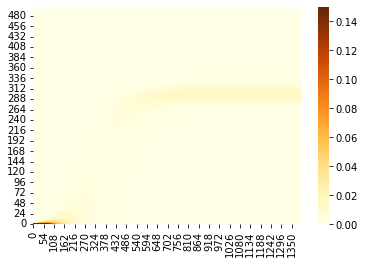

In [8]:
sns.heatmap(tmat.T,vmax=0.15,cmap="YlOrBr")
plt.ylim(0,popsize+1)

(0.0, 501.0)

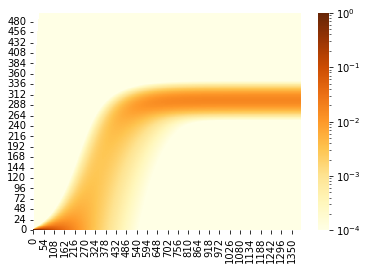

In [9]:
import matplotlib
import copy


from matplotlib.colors import LogNorm
sns.heatmap(tmat.T,cmap="YlOrBr",norm=LogNorm(vmin=0.0001, vmax=1))
plt.ylim(0,popsize+1)

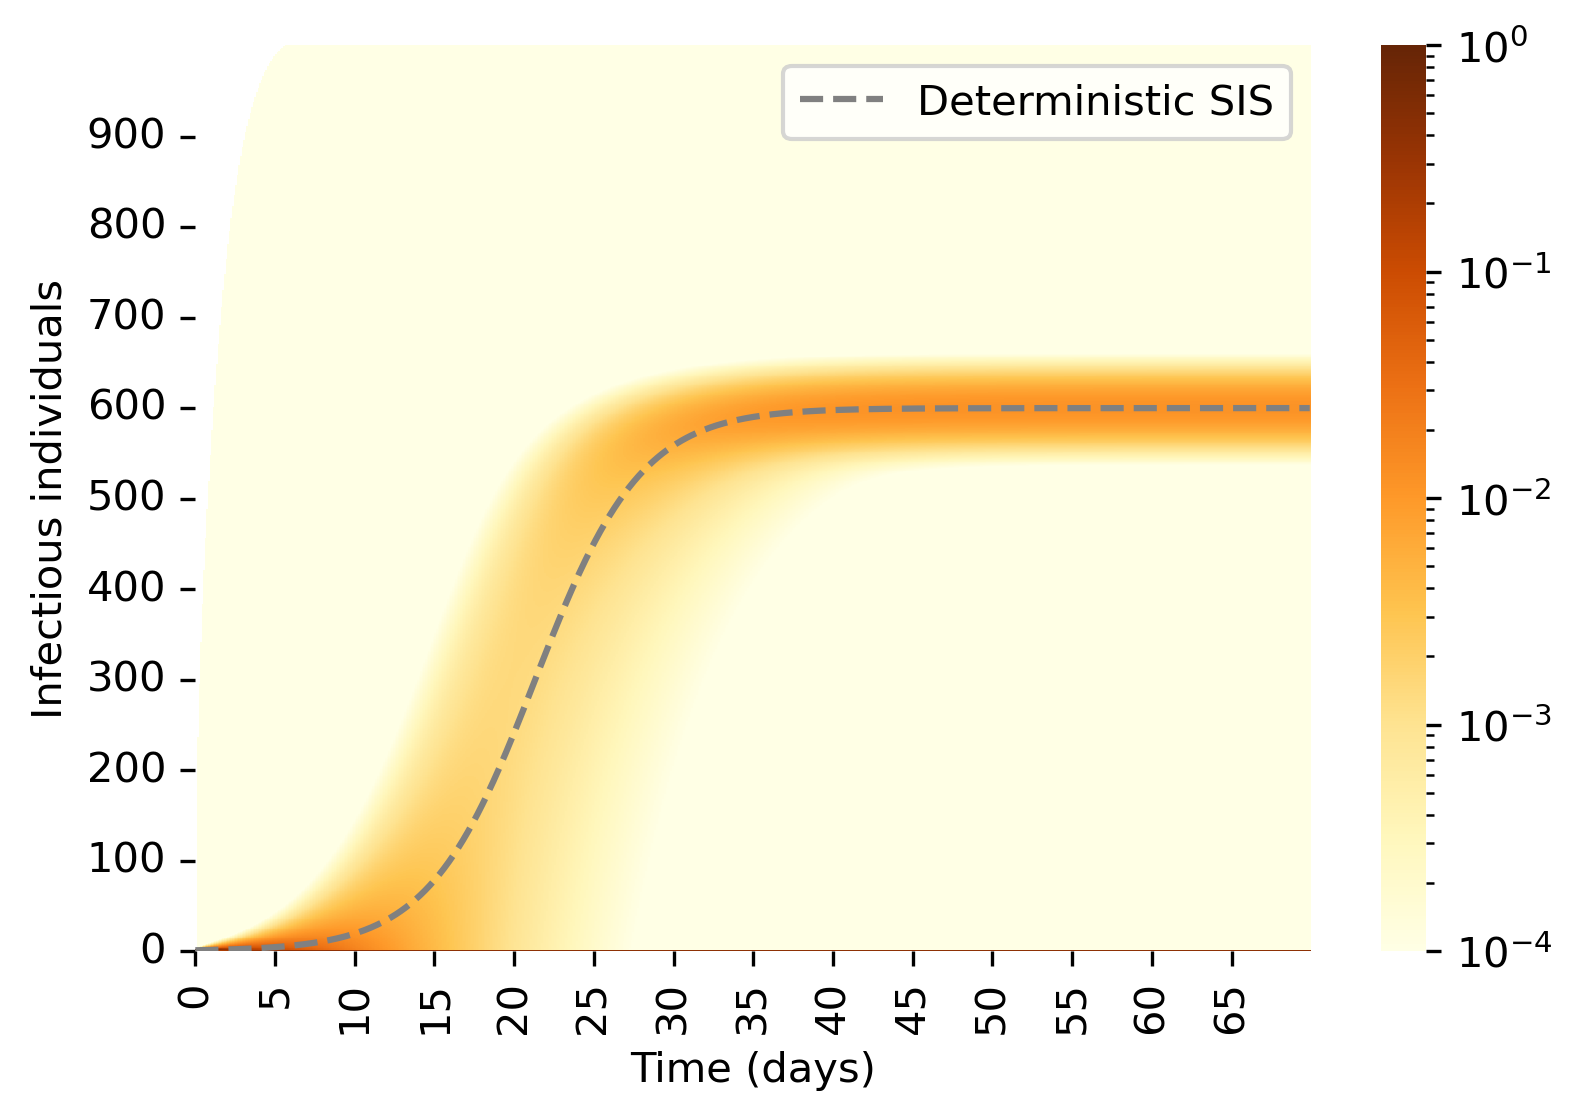

In [23]:
def deriv(y, t, N, beta, gamma):
    I = y
    S=N-y
    dIdt = beta * S * I / N - gamma * I
    return dIdt

# initial condition
y0ode = 1.0
matplotlib.rcParams['figure.dpi'] = 300
# time points

# solve ODE
y = odeint(deriv,y0ode,times,args=(popsize,beta,gamma))
#times=times*10
# plot results
sns.heatmap(tmat2.T,cmap="YlOrBr",norm=LogNorm(vmin=0.0001, vmax=1))
plt.ylim(0,popsize+1)
plt.plot(10*times,y,"--",label="Deterministic SIS",color="gray")
plt.xticks(ticks=range(0,700,50),labels=range(0,70,5))
plt.yticks(ticks=range(0,1000,100),labels=range(0,1000,100))
plt.xlabel("Time (days)")
plt.ylabel("Infectious individuals")
plt.legend()


In [ ]:
plt.plot(times,y,"--",label="Deterministic SIS",color="gray")

In [33]:
6/1400*100


0.4285714285714286